In [3]:
# To upload the kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rishitha2k","key":"3f5bb49552daa6eed5944e99b92622b3"}'}

In [4]:
!mkdir ~/.kaggle

# Changing the path to the .kaggle folder
!cp kaggle.json ~/.kaggle/
#  Changing the permissions to perform read and write access
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Downloading the dogs-vs-cats dataset
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:03<00:00, 238MB/s]
100% 812M/812M [00:03<00:00, 232MB/s]


In [6]:
# Unzipping dogs-vs-cats dataset file
!unzip -qq dogs-vs-cats.zip

Now training the model from scratch

In [7]:
# Unzipping train sample
!unzip -o -qq train.zip

In [8]:
!pip install tensorflow==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 104.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 44.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.

Question-1

In [1]:
# Creating directories and assiging images to training, validation and test directories
import os, shutil, pathlib

#shutil.rmtree("cats_vs_dogs_small")

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [2]:
#Building the model and running the model summary

from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [3]:
# Configuration of the model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [4]:
# Declaring the image size and batch size to read the images from train. validation and test directories
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [5]:
# Using the callbacks function to monitor validation loss and running the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 18s 102ms/step - loss: 0.7021 - accuracy: 0.5165 - val_loss: 0.7037 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 57ms/step - loss: 0.6921 - accuracy: 0.5240 - val_loss: 0.7283 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 4s 59ms/step - loss: 0.6980 - accuracy: 0.5345 - val_loss: 0.6853 - val_accuracy: 0.5410
Epoch 4/30
63/63 [==============================] - 7s 101ms/step - loss: 0.6846 - accuracy: 0.5670 - val_loss: 0.6760 - val_accuracy: 0.6050
Epoch 5/30
63/63 [==============================] - 4s 56ms/step - loss: 0.6803 - accuracy: 0.5880 - val_loss: 0.6452 - val_accuracy: 0.6420
Epoch 6/30
63/63 [==============================] - 5s 68ms/step - loss: 0.6604 - accuracy: 0.6225 - val_loss: 0.6554 - val_accuracy: 0.6040
Epoch 7/30
63/63 [==============================] - 6s 82ms/step - loss: 0.6357 - accuracy: 0.6535 - val_loss: 0.6175 - val_accuracy: 0.6560
Epoch 8/30

In [6]:
# Testing the model
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")



63/63 [==============================] - 3s 47ms/step - loss: 0.5677 - accuracy: 0.7130
Test accuracy: 0.713


Data Augmentation

In [7]:
# Declaring Data Augumentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [8]:
# Building the model and configuing it
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [9]:

   # Using the callbacks function to monitor validation loss and running the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_the_scratch_with_dataaugmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=80,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/80
63/63 [==============================] - 7s 65ms/step - loss: 0.7008 - accuracy: 0.4990 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 2/80
63/63 [==============================] - 6s 92ms/step - loss: 0.6941 - accuracy: 0.5010 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 3/80
63/63 [==============================] - 4s 61ms/step - loss: 0.6989 - accuracy: 0.5210 - val_loss: 0.6881 - val_accuracy: 0.6030
Epoch 4/80
63/63 [==============================] - 5s 83ms/step - loss: 0.6889 - accuracy: 0.5630 - val_loss: 0.6769 - val_accuracy: 0.5870
Epoch 5/80
63/63 [==============================] - 5s 78ms/step - loss: 0.6740 - accuracy: 0.5870 - val_loss: 0.6686 - val_accuracy: 0.5970
Epoch 6/80
63/63 [==============================] - 4s 60ms/step - loss: 0.6434 - accuracy: 0.6475 - val_loss: 0.6247 - val_accuracy: 0.6320
Epoch 7/80
63/63 [==============================] - 4s 59ms/step - loss: 0.6197 - accuracy: 0.6480 - val_loss: 0.6118 - val_accuracy: 0.6660
Epoch 8/80
63

In [10]:
test_model = keras.models.load_model(
    "convnet_from_the_scratch_with_dataaugmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


63/63 [==============================] - 5s 64ms/step - loss: 0.4519 - accuracy: 0.8245
Test accuracy: 0.825


Question-2

In [12]:
# Creating directories and assiging images to training, validation and test directories
# Increasing the training sample from 1000 to 2000
import os
import shutil
import pathlib
#shutil.rmtree("cats_vs_dogs_small_IncreasedTrainSample")
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_IncreasedTrainSample")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

# Training has 2000 samples, test has 1000 samples, and validation has 500 samples
make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=2000, end_index=2500)
make_subset("test", start_index=2500, end_index=3500)

In [13]:
# Building the model
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
# Configuring the model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [15]:
# Using the callbacks function to monitor validation loss and running the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 6s 60ms/step - loss: 0.7340 - accuracy: 0.4985 - val_loss: 0.6925 - val_accuracy: 0.5290
Epoch 2/30
63/63 [==============================] - 5s 80ms/step - loss: 0.6957 - accuracy: 0.5220 - val_loss: 0.6868 - val_accuracy: 0.6010
Epoch 3/30
63/63 [==============================] - 4s 57ms/step - loss: 0.6914 - accuracy: 0.5425 - val_loss: 0.6910 - val_accuracy: 0.5030
Epoch 4/30
63/63 [==============================] - 7s 111ms/step - loss: 0.6914 - accuracy: 0.6010 - val_loss: 0.6672 - val_accuracy: 0.6030
Epoch 5/30
63/63 [==============================] - 5s 75ms/step - loss: 0.6486 - accuracy: 0.6365 - val_loss: 0.7636 - val_accuracy: 0.5510
Epoch 6/30
63/63 [==============================] - 4s 59ms/step - loss: 0.6078 - accuracy: 0.6810 - val_loss: 0.6240 - val_accuracy: 0.6370
Epoch 7/30
63/63 [==============================] - 5s 79ms/step - loss: 0.5874 - accuracy: 0.6860 - val_loss: 0.6516 - val_accuracy: 0.6680
Epoch 8/30
6

In [16]:
# Testing the model
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


63/63 [==============================] - 3s 34ms/step - loss: 0.5587 - accuracy: 0.7200
Test accuracy: 0.720


Question-3

In [17]:
# Creating directories and assiging images to training, validation and test directories
# Increasing the training sample from 1000 to 2000
import os
import shutil
import pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_OptimalTrainSamples1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir,exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

# Trainingset has 1500 samples, testset has 1000 samples, and validationset has 500 samples
# make_subset("train", start_index=0, end_index=3500)
# make_subset("validation", start_index=2500, end_index=3000)
# make_subset("test", start_index=3000, end_index=4000)


In [18]:
# Building the model
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [19]:
# Configuring the model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [20]:
from tensorflow.keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator


# Train the model with varying training sample sizes
sample_sizes = [3500,4000,4500,5000]
history_dict = []
for size in sample_sizes:
    # Set up the training subset
    make_subset("temp_train", start_index=1500, end_index=size)
    make_subset("validation", start_index=size, end_index=size+500)
    make_subset("test", start_index=size+500, end_index=size+1500)
    train_dataset = image_dataset_from_directory(
      new_base_dir / "temp_train",
      image_size=(180, 180),
      batch_size=20)
    # Using the callbacks function to monitor validation loss and running the model

    callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_variedtrain.keras",
        save_best_only=True,
        monitor="val_loss")]

    history = model.fit(
      train_dataset,
      epochs=20,
      validation_data=validation_dataset,
      callbacks=callbacks)

    test_model = keras.models.load_model("convnet_from_scratch_variedtrain.keras")
    test_loss, test_acc = test_model.evaluate(test_dataset)
    history_dict.append(test_acc)
    print(f"Test accuracy: {test_acc:.3f}")


Found 4000 files belonging to 2 classes.
Epoch 1/20
200/200 [==============================] - 12s 44ms/step - loss: 0.7024 - accuracy: 0.5042 - val_loss: 0.6876 - val_accuracy: 0.5540
Epoch 2/20
200/200 [==============================] - 7s 36ms/step - loss: 0.6777 - accuracy: 0.5888 - val_loss: 0.6690 - val_accuracy: 0.5800
Epoch 3/20
200/200 [==============================] - 7s 33ms/step - loss: 0.6351 - accuracy: 0.6348 - val_loss: 0.8464 - val_accuracy: 0.6310
Epoch 4/20
200/200 [==============================] - 9s 46ms/step - loss: 0.5896 - accuracy: 0.6877 - val_loss: 0.5792 - val_accuracy: 0.6890
Epoch 5/20
200/200 [==============================] - 7s 32ms/step - loss: 0.5338 - accuracy: 0.7310 - val_loss: 0.5656 - val_accuracy: 0.7040
Epoch 6/20
200/200 [==============================] - 10s 47ms/step - loss: 0.4962 - accuracy: 0.7655 - val_loss: 0.4699 - val_accuracy: 0.7790
Epoch 7/20
200/200 [==============================] - 7s 32ms/step - loss: 0.4443 - accuracy: 0.793

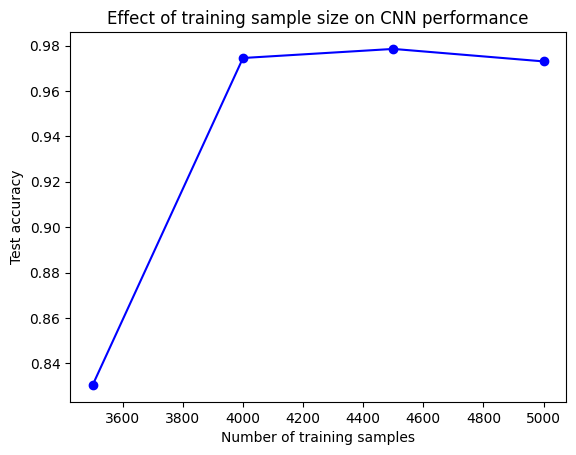

In [21]:
import matplotlib.pyplot as plt
plt.plot(sample_sizes, history_dict, 'bo-')
plt.xlabel('Number of training samples')
plt.ylabel('Test accuracy')
plt.title('Effect of training sample size on CNN performance')
plt.show()

Pre-trained network

Question-4

In [22]:
# Creating directories and assiging images to training, validation and test directories
import os
import shutil
import pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Pretrained")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

# Training has 1500 samples, test has 500 samples, and validation has 500 samples
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)


In [23]:
# Loading pre-trained weights to VGG16 model
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

In [24]:
# Defining function to extract features and labels
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)
# Extracting the features and labels from datasets
train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)
train_features.shape

1/1 [==============================] - 1s 568ms/step


(7000, 5, 5, 512)

In [25]:
# Building the model
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Running the callback function to monitor validation loss
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]

# Training the model
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
219/219 [==============================] - 3s 6ms/step - loss: 9.0417 - accuracy: 0.9504 - val_loss: 7.1285 - val_accuracy: 0.9590
Epoch 2/20
219/219 [==============================] - 1s 5ms/step - loss: 4.0040 - accuracy: 0.9761 - val_loss: 4.3963 - val_accuracy: 0.9710
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 1.6665 - accuracy: 0.9883 - val_loss: 5.5616 - val_accuracy: 0.9650
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 1.4904 - accuracy: 0.9893 - val_loss: 4.2751 - val_accuracy: 0.9720
Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 1.3788 - accuracy: 0.9893 - val_loss: 4.1123 - val_accuracy: 0.9690
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 0.4918 - accuracy: 0.9953 - val_loss: 5.0120 - val_accuracy: 0.9700
Epoch 7/20
219/219 [==============================] - 1s 5ms/step - loss: 0.5729 - accuracy: 0.9944 - val_loss: 4.7993 - val_accuracy: 0.9730
Epoch 

In [26]:
# Testing the model
test_model = keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")


63/63 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9995
Test accuracy: 0.999


In [27]:
# Loading pre-trained weights to the VGG16 model
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
# Freezing the layers of the pretrained CNN
conv_base.trainable = False

# UnFreezing the layers of the pretrained CNN
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


In [28]:
# Declaring Data Augumentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)
# Building the model and configuring it
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [29]:
# Using the callbacks function to monitor validation loss and running the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)



Epoch 1/50
350/350 [==============================] - 18s 43ms/step - loss: 10.0112 - accuracy: 0.9303 - val_loss: 5.3365 - val_accuracy: 0.9690
Epoch 2/50
350/350 [==============================] - 15s 41ms/step - loss: 6.4778 - accuracy: 0.9513 - val_loss: 5.0613 - val_accuracy: 0.9650
Epoch 3/50
350/350 [==============================] - 14s 39ms/step - loss: 3.7714 - accuracy: 0.9550 - val_loss: 2.0729 - val_accuracy: 0.9760
Epoch 4/50
350/350 [==============================] - 15s 43ms/step - loss: 2.1393 - accuracy: 0.9581 - val_loss: 1.0183 - val_accuracy: 0.9740
Epoch 5/50
350/350 [==============================] - 15s 43ms/step - loss: 1.4064 - accuracy: 0.9597 - val_loss: 0.6964 - val_accuracy: 0.9810
Epoch 6/50
350/350 [==============================] - 15s 42ms/step - loss: 1.1158 - accuracy: 0.9601 - val_loss: 1.2345 - val_accuracy: 0.9630
Epoch 7/50
350/350 [==============================] - 15s 43ms/step - loss: 0.9886 - accuracy: 0.9630 - val_loss: 0.6158 - val_accuracy

In [30]:
# Testing the model
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")



63/63 [==============================] - 3s 41ms/step - loss: 0.1707 - accuracy: 0.9920
Test accuracy: 0.992


In [31]:
# Creating directories and assiging images to training, validation and test directories
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_PretrainedIncreasedSample")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir,exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

In [32]:
# Loading pre-trained weights to VGG16 model
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
# conv_base.trainable = False

In [33]:
# Using the callbacks function to monitor validation loss and running the model
make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=3000)

# Building the model
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Running the callback function to monitor validation loss
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]

# Training the model
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)


Epoch 1/20
219/219 [==============================] - 2s 6ms/step - loss: 10.2318 - accuracy: 0.9500 - val_loss: 5.1863 - val_accuracy: 0.9640
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 3.8654 - accuracy: 0.9776 - val_loss: 5.2322 - val_accuracy: 0.9740
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 2.1118 - accuracy: 0.9844 - val_loss: 3.9649 - val_accuracy: 0.9780
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 1.2344 - accuracy: 0.9911 - val_loss: 5.1407 - val_accuracy: 0.9720
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 1.1501 - accuracy: 0.9909 - val_loss: 4.7105 - val_accuracy: 0.9720
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.6872 - accuracy: 0.9931 - val_loss: 4.8915 - val_accuracy: 0.9760
Epoch 7/20
219/219 [==============================] - 1s 4ms/step - loss: 0.5698 - accuracy: 0.9949 - val_loss: 4.5515 - val_accuracy: 0.9760
Epoch

In [34]:
# Testing the model
test_model = keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")


63/63 [==============================] - 0s 3ms/step - loss: 0.1449 - accuracy: 0.9970
Test accuracy: 0.997


In [35]:
# Creating directories and assiging images to training, validation and test directories
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_PretrainedoptimalSample")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir,exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

In [36]:
# Loading pre-trained weights to VGG16 model
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [37]:
# Building the model
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [38]:
from tensorflow.keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

# Train the model with varying training sample sizes
sample_sizes = [2500,3000,4000,5000]
history_dict = []
for size in sample_sizes:
    # Set up the training subset
    make_subset("temp_train", start_index=0, end_index=size)
    make_subset("validation", start_index=size, end_index=size+500)
    make_subset("test", start_index=size+500, end_index=size+1500)
    train_dataset = image_dataset_from_directory(
      new_base_dir / "temp_train",
      image_size=(180, 180),
      batch_size=20)
    # Running the callback function to monitor validation loss
    callbacks = [
      keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")]

    # Training the model
    history = model.fit(
      train_features, train_labels,
      epochs=20,
      validation_data=(val_features, val_labels),
      callbacks=callbacks)

   # Testing the model
    test_model = keras.models.load_model("feature_extraction.keras")
    test_loss, test_acc = test_model.evaluate(test_features, test_labels)
    print(f"Test accuracy: {test_acc:.3f}")


Found 5000 files belonging to 2 classes.
Epoch 1/20
219/219 [==============================] - 2s 6ms/step - loss: 10.3330 - accuracy: 0.9490 - val_loss: 5.0387 - val_accuracy: 0.9700
Epoch 2/20
219/219 [==============================] - 1s 5ms/step - loss: 4.0844 - accuracy: 0.9763 - val_loss: 4.5030 - val_accuracy: 0.9760
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 1.9802 - accuracy: 0.9861 - val_loss: 6.9596 - val_accuracy: 0.9670
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 1.4380 - accuracy: 0.9890 - val_loss: 7.7637 - val_accuracy: 0.9640
Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 0.8382 - accuracy: 0.9920 - val_loss: 4.7463 - val_accuracy: 0.9750
Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.9755 - accuracy: 0.9916 - val_loss: 4.5964 - val_accuracy: 0.9770
Epoch 7/20
219/219 [==============================] - 1s 5ms/step - loss: 0.6727 - accuracy: 0.9939 - val_